# Sistema Predictor BMT
### Carlos Javier Leal Beltran A01741355
### Carlos Moises Chavez Jimenez A01637322
### Ernesto Adrian Alvarez Salazar A00227490
### Luis Armando Salazar Lopez A0114901



Sistema que predice el nivel de agua y el caudal del río North Platte, situado en Wyoming, Nebraska, basándose en imágenes del río.


**Variables del Dataset:**

- SensorTime -> La fecha y hora del sensor -> aaaa-mm-dd hh:mm:ss
- CaptureTime -> La fecha y hora de la captura -> aaaa-mm-ddThh:mm:ss
- Filename -> El nombre del archivo correspondiente a la captura
- Agency -> La agencia que hizo la captura
- SiteNumber -> ID del sitio donde se hizo la captura
- TimeZone -> Tres letras, el uso horario del sitio de la captura
- Stage -> La altura del nivel del agua en el rio -> medida en metros
- Discharge -> El caudal del rio -> medido en metros^3 / segundo
- CalcTimestamp -> La fecha y hora de la captura -> aaaa-mm-ddThh:mm:ss
- width -> La cantidad de pixeles a lo ancho en la captura
- height -> La cantidad de pixeles en lo alto de la captura
- exposure -> La cantidad de luz que recibio la captura
- fNumber -> La razon focal del lente
- isoSpeed -> La sensibilidad de la camara a la luz
- shutterSpeed -> El tiempo que estuvo abierto el lente
- grayMean -> Promedio de intensidad de los pixeles despues de convertirlos a escala de grises
- graySigma -> Sumatoria de intensidades de los pixeles despues de converirlos a escala de grises
- entropyMean -> Promedio de entropia Shannon de los pixeles en escala de grises
- entropySigma -> Sumatoria de entropia Shannon de los pixeles en escala de grises
- hMean -> Promedio de matiz (hue) tomando cada pixel en formato HSV
- hSigma -> Sumatoria de matiz (hue) tomando cada pixel en formato HSV
- sMean -> Promedio de saturacion tomando cada pixel en formato HSV
- sSigma -> Sumatoria de saturacion tomando cada pixel en formato HSV
- vMean -> Promedio de valor (value) tomando cada pixel en formato HSV
- vSigma -> Sumatoria de valor (value) tomando cada pixel en formato HSV
- areaFeatCount -> 
- grayMean 0 -> Promedio de intensidad de los pixeles en escala de gris, por encima de la caida del agua
- graySigma 0 -> Sumatoria de intensidad de los pixeles en escala de gris, por encima de la caida del agua
- entropyMean 0 -> Promedio de entropia de los pixeles en escala de grises despues de la caida del agua
- entropySigma 0 -> Sumatoria de entropia de los pixeles en escala de grises despues de la caida del agua
- hMean 0 -> Promedio de matiz (hue) tomando cada pixel en formato HSV, despues de la caida del agua
- hSigma 0 -> Sumatoria de matiz (hue) tomando cada pixel en formato HSV, despues de la caida del agua
- sMean 0 -> Promedio de saturacion tomando cada pixel en formato HSV, despues de la caida del agua
- sSigma 0 -> Sumatoria de saturacion tomando cada pixel en formato HSV, despues de la caida del agua
- vMean 0 -> Promedio de valor (value) tomando cada pixel en formato HSV, despues de la caida del agua
- vSigma 0 -> Sumatoria de valor (value) tomando cada pixel en formato HSV, despues de la caida del agua
- grayMean 0 -> Promedio de intensidad de los pixeles en escala de gris, antes de la caida del agua
- graySigma 0 -> Sumatoria de intensidad de los pixeles en escala de gris, antes de la caida del agua
- entropyMean 0 -> Promedio de entropia de los pixeles en escala de grises, antes de la caida del agua
- entropySigma 0 -> Sumatoria de entropia de los pixeles en escala de grises, antes de la caida del agua
- hMean 0 -> Promedio de matiz (hue) tomando cada pixel en formato HSV, antes de la caida del agua
- hSigma 0 -> Sumatoria de matiz (hue) tomando cada pixel en formato HSV, antes de la caida del agua
- sMean 0 -> Promedio de saturacion tomando cada pixel en formato HSV, antes de la caida del agua
- sSigma 0 -> Sumatoria de saturacion tomando cada pixel en formato HSV, antes de la caida del agua
- vMean 0 -> Promedio de valor (value) tomando cada pixel en formato HSV, antes de la caida del agua
- vSigma 0 -> Sumatoria de valor (value) tomando cada pixel en formato HSV, antes de la caida del agua
- WeirAngle -> Angulo donde se encuentra la caida del agua
- WeirPt1X -> Punto lejano para el calculo de la caida del agua, eje X
- WeirPt1Y -> Punto lejano para el calculo de la caida del agua, eje Y
- WeirPt2X -> Punto cercano para el calculo de la caida del agua, eje X
- WeirPt2Y -> Punto cercano para el calculo de la caida del agua, eje Y
- WwRawLineMin -> Distancia minima entre la caida del agua y el agua blanca
- WwRawLineMax -> Distancia maxima entre la caida del agua y el agua blanca
- WwRawLineMean -> Promedio de distancias entre la caida del agua y el agua blanca
- WwRawLineSigma -> Sumatoria de distancias entre la caida del agua y el agua blanca
- WwCurveLineMin -> Distancia minima entre la caida del agua y la curva del agua blanca
- WwCurveLineMax -> Distancia maxima entre la caida del agua y la curva del agua blanca
- WwCurveLineMean -> Promedio de distancias entre la caida del agua y la curva del agua blanca
- WwCurveLineSigma -> Sumatoria de distancias entre la caida del agua y la curva del agua blanca- 

## Librerías y Permisos

In [ ]:
# Importaremos todas las librerías necesarias para nuestro código.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats
import math

from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Parte 0: Eliminación de imagenes imprecisas del dataset original.

Para aumentar la efectividad del modelo consideramos necesario eliminar las imagenes que podrían generar impresición en nuestro modelo de predicción. De las imagenes otorgadas en un principio, le aplicamos un recorte para dejar solamente la parte que consideramos útil para analizar. Esas imagenes recortadas las pasamos por un modelo de clasificación para eliminar las muestras que nos pudieran llegar a afectar. Al final, generamos un dataset con las imagenes a eliminar del dataset original. Teniendo el dataset con las imagenes útiles, podemos volver a entrenar nuestro modelo de predicción.

### 0.1 - Importaremos y analizarémos el dataset con las imagenes a descartar.

In [ ]:
# Importando los datos
aux=pd.read_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/different_seasons.csv')
#aux=pd.read_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/consecutive_seasons.csv')
#aux=pd.read_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/random_seasons.csv')

In [ ]:
aux

,StateLineWeir_20130804_Farrell_019.JPG
0,StateLineWeir_20130805_Farrell_028.JPG
1,StateLineWeir_20130805_Farrell_033.JPG
2,StateLineWeir_20130806_Farrell_054.JPG
3,StateLineWeir_20130806_Farrell_057.JPG
4,StateLineWeir_20130807_Farrell_064.JPG
...,...
210,StateLineWeir_20190802_Farrell_960.jpg
211,StateLineWeir_20190802_Farrell_976.jpg
212,StateLineWeir_20190803_Farrell_978.jpg
213,StateLineWeir_20190803_Farrell_981.jpg


In [ ]:
# Veremos también la cantidad de registros y variables que tenemos disponibles
Nrows = aux.shape[0]
Ncols = aux.shape[1]

print("Number of persons (rows)  = {0:0d}".format(Nrows))
print("Number of variables(columns)   = {0:0d}".format(Ncols))

Number of persons (rows)  = 215
Number of variables(columns)   = 1


In [ ]:
# Haremos un resúmen a grandes rasgos de la información disponible
aux.describe()

,StateLineWeir_20130804_Farrell_019.JPG
count,215
unique,215
top,StateLineWeir_20130805_Farrell_028.JPG
freq,1


In [ ]:
# Mostraremos el tipo de dato de cada variable de la bd
aux.dtypes

StateLineWeir_20130804_Farrell_019.JPG    object
dtype: object

### 0.2 - Eliminaremos las imagenes detectadas como incorrectas de nuestro clasificador en el dataset general.

In [ ]:
# Importando el dataset completo
df=pd.read_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/2012_2019_PlatteRiverWeir_features_merged_all.csv')

In [ ]:
# Código para eliminar del dataset original las imagenes que nos indiqué el dataset de clasificación.
df_with_index = df.set_index("Filename")
for i in aux:
  df = df_with_index.drop(i)

# Parte 1: Entrenamiento y Evaluación de los datos existentes.

## 1- Importación de los datos y muestreo general.

In [ ]:
df

,SensorTime,CaptureTime,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,height,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
Filename,,,,,,,,,,,,,,,,,,,,,
StateLineWeir_20120609_Farrell_001.jpg,09/06/2012 13:15,2012-06-09T13:09:07,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,2848,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
StateLineWeir_20120609_Farrell_002.jpg,09/06/2012 13:15,2012-06-09T13:10:29,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,2848,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
StateLineWeir_20120609_Farrell_003.jpg,09/06/2012 13:45,2012-06-09T13:44:01,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,2848,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
StateLineWeir_20120609_Farrell_004.jpg,09/06/2012 14:45,2012-06-09T14:44:30,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,2848,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
StateLineWeir_20120609_Farrell_005.jpg,09/06/2012 15:45,2012-06-09T15:44:59,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,2848,...,-1,-1,0,0,0.00000,0.00000,0,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
StateLineWeir_20191011_Farrell_409.jpg,11/10/2019 09:00,2019-10-11T08:59:53,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:53,4288,2848,...,2446,1900,9284,77521,38385.37007,15952.02973,0,70085,37550.89482,16444.40121
StateLineWeir_20191011_Farrell_410.jpg,11/10/2019 10:00,2019-10-11T09:59:52,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:54,4288,2848,...,2440,1900,10092,74614,40162.98929,15467.70886,0,70061,39397.33910,16009.00805
StateLineWeir_20191011_Farrell_411.jpg,11/10/2019 11:00,2019-10-11T10:59:52,USGS,6674500,MDT,2.54,434.0,2020-03-12T16:23:55,4288,2848,...,2447,1900,7067,83260,42095.94659,16770.35795,0,76335,41350.00657,17489.37462


In [ ]:
# Veremos también la cantidad de registros y variables que tenemos disponibles
Nrows = df.shape[0]
Ncols = df.shape[1]

print("Number of persons (rows)  = {0:0d}".format(Nrows))
print("Number of variables(columns)   = {0:0d}".format(Ncols))

Number of persons (rows)  = 42058
Number of variables(columns)   = 58


In [ ]:
# Haremos un resúmen a grandes rasgos de la información disponible
df.describe()

,SiteNumber,Stage,Discharge,width,height,exposure,fNumber,isoSpeed,shutterSpeed,grayMean,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
count,42058.0,42058.000000,42058.00000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,...,42058.00000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.0,42058.000000,42058.000000,42058.000000
mean,6674500.0,2.878737,970.95242,4288.122117,2848.082172,0.161724,4.001284,200.261544,-0.886026,94.079600,...,1898.13995,1632.193043,1977.286604,65648.802725,30264.304518,15730.917055,0.0,60178.027819,29771.709520,15695.825730
std,0.0,0.805541,1192.28618,14.458717,9.729230,0.927808,0.087762,31.007802,1.128991,15.028271,...,781.48865,661.355320,4652.944006,32223.169359,18033.739165,8019.637228,0.0,30400.954122,17742.864989,8115.933270
min,6674500.0,0.000000,0.00000,4288.000000,2848.000000,0.000125,4.000000,200.000000,-3.000000,55.006235,...,-1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6674500.0,2.280000,213.00000,4288.000000,2848.000000,0.000400,4.000000,200.000000,-1.000000,85.048772,...,2065.00000,1900.000000,0.000000,54054.000000,22276.395137,12542.493265,0.0,48217.250000,21864.831667,12283.172637
50%,6674500.0,2.550000,387.50000,4288.000000,2848.000000,0.000800,4.000000,200.000000,-1.000000,93.352026,...,2144.00000,1900.000000,0.000000,71155.500000,30989.965165,16836.287115,0.0,64319.000000,30464.862180,16720.734040
75%,6674500.0,3.290000,1350.00000,4288.000000,2848.000000,0.004000,4.000000,200.000000,-1.000000,102.486918,...,2264.00000,1900.000000,1869.500000,87312.000000,39180.624690,20831.066838,0.0,80070.500000,38551.654353,20913.203593
max,6674500.0,6.490000,7920.00000,6000.000000,4000.000000,25.000000,13.000000,4000.000000,12.643856,168.998160,...,3275.00000,1900.000000,68747.000000,132262.000000,113048.598100,48565.667750,0.0,130865.000000,110286.915800,48267.082320


In [ ]:
# Mostraremos el tipo de dato de cada variable de la bd
df.dtypes

SensorTime           object
CaptureTime          object
Agency               object
SiteNumber            int64
TimeZone             object
Stage               float64
Discharge           float64
CalcTimestamp        object
width                 int64
height                int64
exposure            float64
fNumber               int64
isoSpeed              int64
shutterSpeed        float64
grayMean            float64
graySigma           float64
entropyMean         float64
entropySigma        float64
hMean               float64
hSigma              float64
sMean               float64
sSigma              float64
vMean               float64
vSigma              float64
areaFeatCount         int64
grayMean 0          float64
graySigma 0         float64
entropyMean 0       float64
entropySigma 0      float64
hMean 0             float64
hSigma 0            float64
sMean 0             float64
sSigma 0            float64
vMean 0             float64
vSigma 0            float64
grayMean 1          

In [ ]:
# Función para revisar que el dataset de training no tenga datos faltantes
pd.isna(df).sum()

SensorTime          0
CaptureTime         0
Agency              0
SiteNumber          0
TimeZone            0
Stage               0
Discharge           0
CalcTimestamp       0
width               0
height              0
exposure            0
fNumber             0
isoSpeed            0
shutterSpeed        0
grayMean            0
graySigma           0
entropyMean         0
entropySigma        0
hMean               0
hSigma              0
sMean               0
sSigma              0
vMean               0
vSigma              0
areaFeatCount       0
grayMean 0          0
graySigma 0         0
entropyMean 0       0
entropySigma 0      0
hMean 0             0
hSigma 0            0
sMean 0             0
sSigma 0            0
vMean 0             0
vSigma 0            0
grayMean 1          0
graySigma 1         0
entropyMean 1       0
entropySigma 1      0
hMean 1             0
hSigma 1            0
sMean 1             0
sSigma 1            0
vMean 1             0
vSigma 1            0
WeirAngle 

## 2 - Limpiaremos y transformaremos los datos a valores que sean más manejables para nosotros.

In [ ]:
# Limpiado de los datos sobre el tiempo.
# Tiempo del Sensor
df.SensorTime = df['SensorTime'].str.replace(' ','')
df.SensorTime = df['SensorTime'].str.replace('/','')
df.SensorTime = df['SensorTime'].str.replace(':','')

# Calculo del Timestamp
df.CalcTimestamp = df['CalcTimestamp'].str.replace('T','')
df.CalcTimestamp = df['CalcTimestamp'].str.replace('-','')
df.CalcTimestamp = df['CalcTimestamp'].str.replace(':','')
df = df.rename(columns={'CalcTimestamp':'Timestamp'})
df['Timestamp'] = pd.to_numeric(df['Timestamp'])

# Tiempo de la Captura
df.CaptureTime = df['CaptureTime'].str.replace('T','')
df.CaptureTime = df['CaptureTime'].str.replace('-','')
df.CaptureTime = df['CaptureTime'].str.replace(':','')

In [ ]:
# Normalizamos los datos de Timestamp, los hacemos comenzar en 0
df['Timestamp'] = df['Timestamp'] - (df['Timestamp'].min() + 4578)
df['Timestamp']

Filename
StateLineWeir_20120609_Farrell_001.jpg         0
StateLineWeir_20120609_Farrell_002.jpg         5
StateLineWeir_20120609_Farrell_003.jpg        12
StateLineWeir_20120609_Farrell_004.jpg        19
StateLineWeir_20120609_Farrell_005.jpg        27
                                           ...  
StateLineWeir_20191011_Farrell_409.jpg    996525
StateLineWeir_20191011_Farrell_410.jpg    996526
StateLineWeir_20191011_Farrell_411.jpg    996527
StateLineWeir_20191011_Farrell_412.jpg    996528
StateLineWeir_20191011_Farrell_413.jpg    996530
Name: Timestamp, Length: 42058, dtype: int64

## 3 - Mostraremos la correlación de las variables a analizar (Stage y Discharge) contra las demas para descartar variables que no se relacionen.

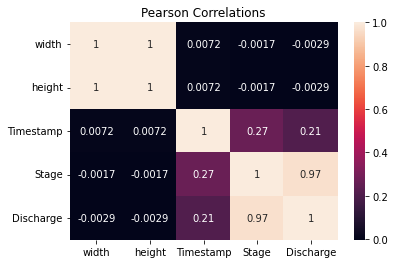

In [ ]:
import seaborn as sns

rel = df[['width','height','Timestamp','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

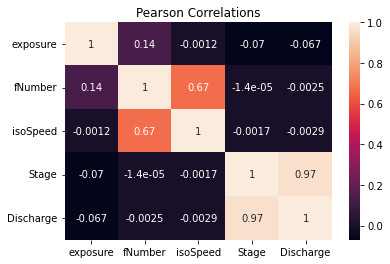

In [ ]:
rel = df[['exposure','fNumber','isoSpeed','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

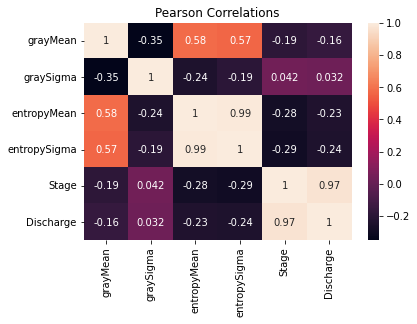

In [ ]:
rel = df[['grayMean','graySigma','entropyMean','entropySigma','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

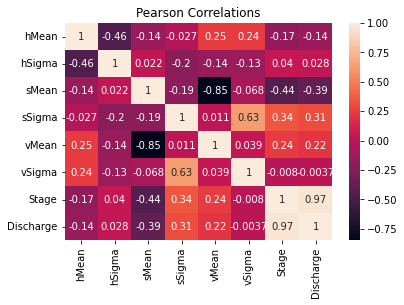

In [ ]:
rel = df[['hMean','hSigma','sMean','sSigma','vMean','vSigma','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

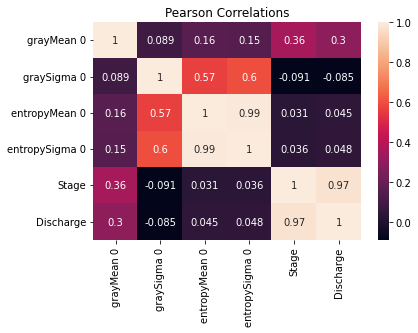

In [ ]:
rel = df[['grayMean 0','graySigma 0','entropyMean 0','entropySigma 0','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

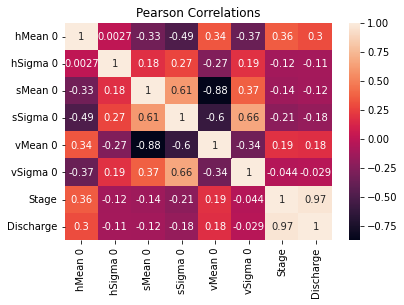

In [ ]:
rel = df[['hMean 0','hSigma 0','sMean 0','sSigma 0','vMean 0','vSigma 0','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

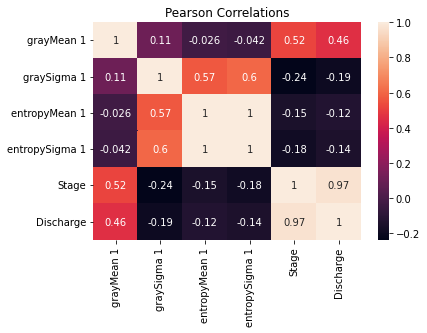

In [ ]:
rel = df[['grayMean 1','graySigma 1','entropyMean 1','entropySigma 1','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

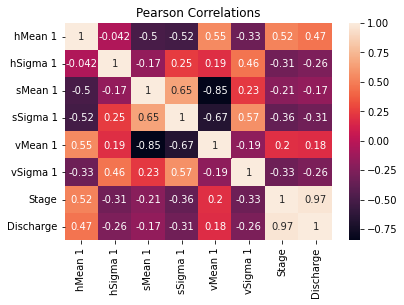

In [ ]:
rel = df[['hMean 1','hSigma 1','sMean 1','sSigma 1','vMean 1','vSigma 1','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

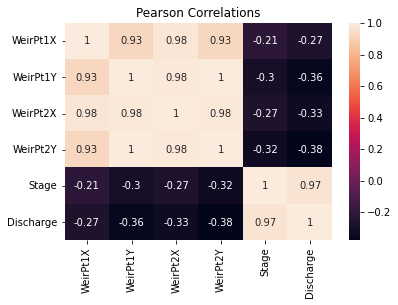

In [ ]:
rel = df[['WeirPt1X','WeirPt1Y','WeirPt2X','WeirPt2Y','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

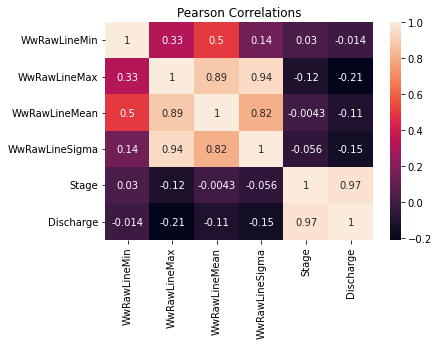

In [ ]:
rel = df[['WwRawLineMin','WwRawLineMax','WwRawLineMean','WwRawLineSigma','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

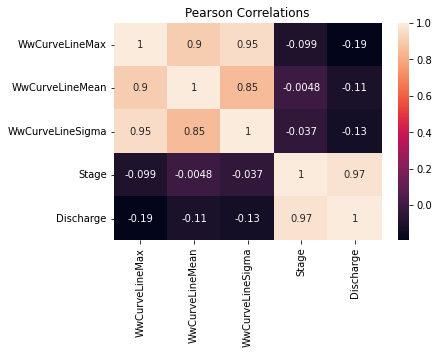

In [ ]:
rel = df[['WwCurveLineMax','WwCurveLineMean','WwCurveLineSigma','Stage','Discharge']]

# Calcularemos la correlación entre las variables
ax = sns.heatmap(rel.corr(), annot=True).set(title='Pearson Correlations');

Las variables que seleccionamos son:
- sSigma 0.34
- grayMean 0 0.36
- hMean 0 0.36
- grayMean 1 0.52
- hMean 1 0.52
- sMean -0.44
- sSigma 1 -0.36
- WeirPt1Y -0.36
- WeirPt2X -0.33
- WeirPt2Y -0.38





## 4 - Graficaremos diagramas de Cajas y Bigotes con las variables que seleccionamos como relacionadas a nuestras variables dependientes para mostrar los valores atípicos.

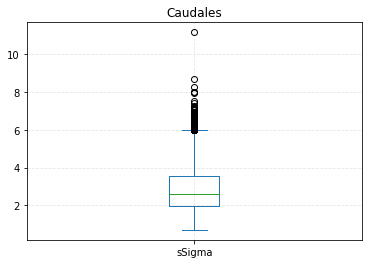

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en sSigma
df[['sSigma']].plot.box(title="Caudales")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

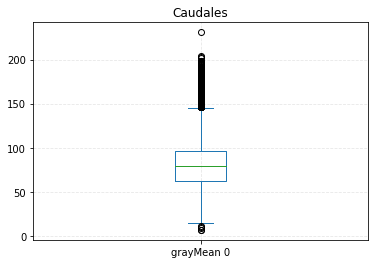

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en grayMean 0
df[['grayMean 0']].plot.box(title="Caudales")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

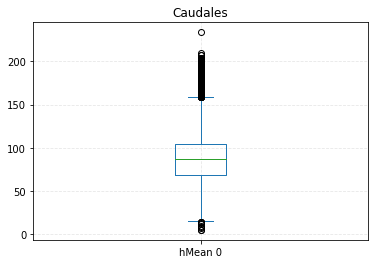

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en hMean 0
df[['hMean 0']].plot.box(title="Caudales")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

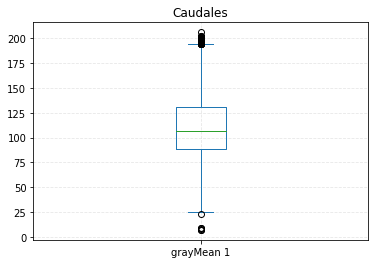

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en grayMean 1
df[['grayMean 1']].plot.box(title="Caudales")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

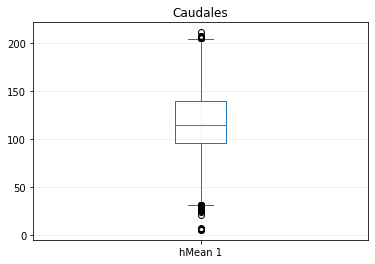

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en hMean 1
df[['hMean 1']].plot.box(title="Caudales")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

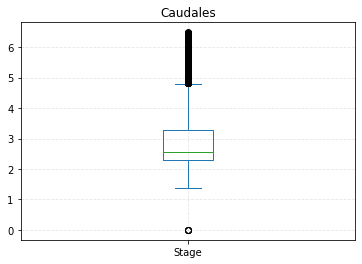

In [ ]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos en Stage
df[['Stage']].plot.box(title="Caudales")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

# Parte 2: Generación y evaluación de los modelos de predicción para Discharge y Stage.

## Discharge

### 14 - Elegiremos las variables independientes con más influencia sobre discharge.

In [ ]:
x = df[['grayMean','graySigma','entropyMean','hMean','hSigma','sMean','sSigma','vMean','vSigma','grayMean 0','graySigma 0','entropySigma 0','hMean 0','hSigma 0','sMean 0','sSigma 0','vMean 0','vSigma 0','grayMean 1','graySigma 1','entropyMean 1','entropySigma 1','hMean 1','hSigma 1','sMean 1','sSigma 1','vMean 1','vSigma 1','WeirPt1X','WeirPt1Y','WeirPt2X','WeirPt2Y','WwRawLineMin','WwRawLineMax','WwRawLineMean','WwRawLineSigma','WwCurveLineMax','WwCurveLineMean','WwCurveLineSigma']]
y = df['Discharge']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True, random_state = 8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.25, random_state= 8)

### 15 - Utilizaremos dos metodos para conocer saber si las variables independientes que elegimos tienen la suficiente influencia para quedarse en el modelo.

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_val)
print(clf.coef_)
print(clf.intercept_)

[-9.61776423e+01  1.78119108e+02 -1.31466349e+04  7.77359917e+01
 -1.54324296e+02 -4.65793961e+01  8.31443349e+01 -2.39819330e+01
  5.96451362e+01  2.15014689e+01  3.13006227e+01  1.77364532e+03
 -2.24256238e+01 -4.52237661e+01  8.20815544e+01 -1.29128977e+01
  4.86621795e+01  5.11154603e+01 -4.60510067e+00  1.00567746e+02
 -8.08939458e+03  2.32328533e+03  1.83490832e+01 -1.08236287e+02
 -3.59207504e+01 -1.52496475e+02 -2.14012424e+01 -7.09852529e+01
  2.42719501e+00  4.75432943e+00 -2.20337316e+00 -1.98490172e+00
 -6.55273513e-03 -8.06941574e-03  3.76465625e-02 -9.44578034e-02
 -4.64408973e-03 -4.51165081e-02  1.12624043e-01]
1333.8862019215526


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.720e+09, tolerance: 3.572e+06
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X=df[['grayMean','graySigma','entropyMean','entropySigma','hMean','hSigma','sMean','sSigma','vMean','vSigma','grayMean 0','graySigma 0','entropyMean 0','entropySigma 0','hMean 0','hSigma 0','sMean 0','sSigma 0','vMean 0','vSigma 0','grayMean 1','graySigma 1','entropyMean 1','entropySigma 1','hMean 1','hSigma 1','sMean 1','sSigma 1','vMean 1','vSigma 1','WeirPt1X','WeirPt1Y','WeirPt2X','WeirPt2Y','WwRawLineMin','WwRawLineMax','WwRawLineMean','WwRawLineSigma','WwCurveLineMax','WwCurveLineMean','WwCurveLineSigma']]
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            features    vif_Factor
0           grayMean  8.058448e+04
1          graySigma  2.066639e+04
2        entropyMean  4.847741e+03
3       entropySigma  3.962039e+03
4              hMean  7.942477e+04
5             hSigma  2.076647e+04
6              sMean  3.304360e+04
7             sSigma  4.865320e+01
8              vMean  5.181259e+03
9             vSigma  6.192573e+01
10        grayMean 0  1.492667e+04
11       graySigma 0  2.083625e+03
12     entropyMean 0  1.475356e+03
13    entropySigma 0  1.380211e+03
14           hMean 0  1.551456e+04
15          hSigma 0  2.228773e+03
16           sMean 0  3.072326e+04
17          sSigma 0  3.787013e+01
18           vMean 0  4.037212e+03
19          vSigma 0  1.520392e+01
20        grayMean 1  2.985558e+04
21       graySigma 1  8.005539e+03
22     entropyMean 1  4.428722e+03
23    entropySigma 1  5.098486e+03
24           hMean 1  3.299678e+04
25          hSigma 1  8.263178e+03
26           sMean 1  4.265950e+04
27          sSigma 1

### 17 - Generaremos un modelo regresor con Random Forest sin limpiar los datos para comprobar la fiabilidad mostrada el Paper inicial.

Teniendo el modelo analizaremos su efectividad.

In [ ]:
RFR = RandomForestRegressor()

model = RFR.fit(x_train,y_train)

In [ ]:
y_pred = RFR.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

array([1402.16 , 4201.   , 1539.07 , ...,   91.077,  249.888,  736.38 ])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.8428585325677589
MSE:  230830.60878807204
RSMSE:  480.4483414354472
MAE:  199.334044234427
Error estandar:  480.519141246104


Text(0, 0.5, 'Standarized residuals')

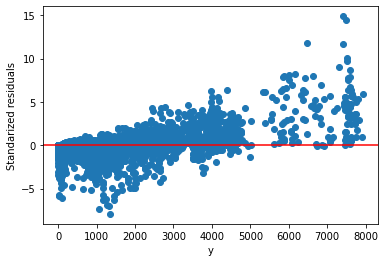

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

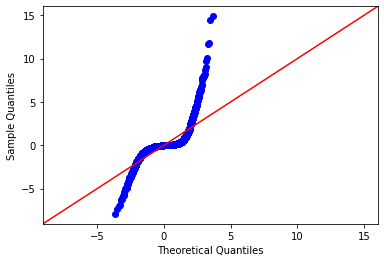

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258455e+02
graySigma           8.737685e+01
entropyMean         8.943846e-04
hMean               2.666542e+02
hSigma              9.535359e+01
sMean               8.232337e+00
sSigma              1.246465e+00
vMean               6.902910e+01
vSigma              1.319498e+01
grayMean 0          5.713214e+02
graySigma 0         2.188959e+01
entropySigma 0      9.880203e-03
hMean 0             6.687341e+02
hSigma 0            2.413840e+01
sMean 0             1.276457e+01
sSigma 0            8.460181e-02
vMean 0             1.298258e+02
vSigma 0            6.583802e-01
grayMean 1          9.137339e+02
graySigma 1         5.855153e+01
entropyMean 1       8.369477e-04
entropySigma 1      3.669825e-02
hMean 1             9.583729e+02
hSigma 1            5.919095e+01
sMean 1             1.128659e+01
sSigma 1            2.481269e-01
vMean 1             1.218385e+02
vSigma 1            3.206962e+00
WeirPt1X            1.370687e+05
WeirPt1Y            1.929713e+05
WeirPt2X  

### 18 - Utilizaremos también los modelos MLP y SVR para contrastarlos con los del paper.
Teniendo el modelo analizaremos su efectividad.

**MLP**

In [ ]:
sc=StandardScaler()

scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
valX_scaled = scaler.transform(x_val)
testX_scaled = scaler.transform(x_test)
x_scaled = scaler.transform(x)

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(150,100,50),
                    max_iter = 300,activation = 'relu',
                    solver = 'adam')
model = MLP.fit(trainX_scaled,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = MLP.predict(valX_scaled)
residuals = y_val.squeeze() - y_pred
y_pred

array([1463.10267547, 3634.86679572, 1705.15035836, ...,   13.74739172,
        220.66666697,  226.37453828])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9157598224645278
MSE:  123743.27771192083
RSMSE:  351.77162721277114
MAE:  160.9001891478277
Error estandar:  350.27568388863943


Text(0, 0.5, 'Standarized residuals')

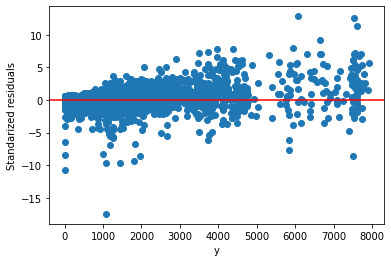

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

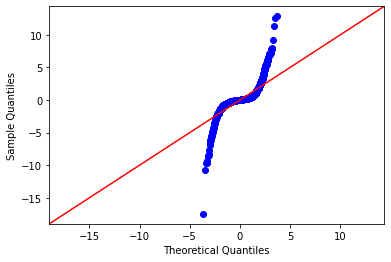

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258436e+02
graySigma           8.738272e+01
entropyMean         8.943771e-04
hMean               2.666514e+02
hSigma              9.535989e+01
sMean               8.232124e+00
sSigma              1.246441e+00
vMean               6.902698e+01
vSigma              1.319502e+01
grayMean 0          5.713138e+02
graySigma 0         2.188938e+01
entropySigma 0      9.880190e-03
hMean 0             6.687236e+02
hSigma 0            2.413812e+01
sMean 0             1.276430e+01
sSigma 0            8.460263e-02
vMean 0             1.298260e+02
vSigma 0            6.584043e-01
grayMean 1          9.136511e+02
graySigma 1         5.855076e+01
entropyMean 1       8.369530e-04
entropySigma 1      3.669844e-02
hMean 1             9.582901e+02
hSigma 1            5.919077e+01
sMean 1             1.128645e+01
sSigma 1            2.481304e-01
vMean 1             1.218386e+02
vSigma 1            3.206963e+00
WeirPt1X            1.370681e+05
WeirPt1Y            1.929711e+05
WeirPt2X  

In [ ]:
discharge_pred = MLP.predict(x_scaled)
residuals = y.squeeze() - discharge_pred
discharge_pred

array([1157.19745451, 1144.07579595, 1113.69023459, ...,  268.5909638 ,
        318.04343026,  324.62744473])

**SVR**

In [ ]:
SVRreg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=7.0, epsilon=0.1))
model = SVRreg.fit(x_train,y_train)

In [ ]:
y_pred = SVRreg.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

array([1279.86896175, 1657.5441686 , 1243.54207593, ...,  205.14560893,
        341.98595584,  405.74385229])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.4464374257558764
MSE:  813147.4658028209
RSMSE:  901.7468967525316
MAE:  390.64895141446806
Error estandar:  881.2995623089982


Text(0, 0.5, 'Standarized residuals')

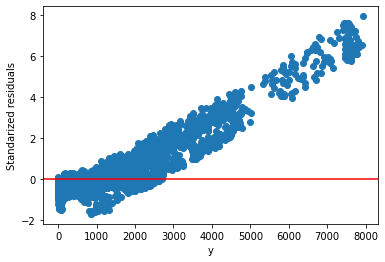

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

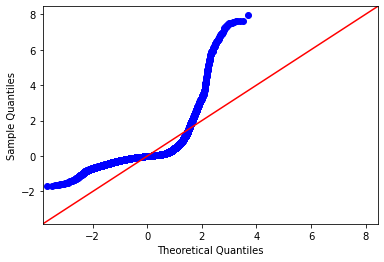

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258455e+02
graySigma           8.737685e+01
entropyMean         8.943846e-04
hMean               2.666542e+02
hSigma              9.535359e+01
sMean               8.232337e+00
sSigma              1.246465e+00
vMean               6.902910e+01
vSigma              1.319498e+01
grayMean 0          5.713214e+02
graySigma 0         2.188959e+01
entropySigma 0      9.880203e-03
hMean 0             6.687341e+02
hSigma 0            2.413840e+01
sMean 0             1.276457e+01
sSigma 0            8.460181e-02
vMean 0             1.298258e+02
vSigma 0            6.583802e-01
grayMean 1          9.137339e+02
graySigma 1         5.855153e+01
entropyMean 1       8.369477e-04
entropySigma 1      3.669825e-02
hMean 1             9.583729e+02
hSigma 1            5.919095e+01
sMean 1             1.128659e+01
sSigma 1            2.481269e-01
vMean 1             1.218385e+02
vSigma 1            3.206962e+00
WeirPt1X            1.370687e+05
WeirPt1Y            1.929713e+05
WeirPt2X  

### 19 - Generaremos ahora un modelo regresión de tipo mínimos cuadrados ordinarios. Esto nos permitirá comparar este modelo con el anterior de Random Forest.

In [ ]:
reg = sm.OLS(y_train, x_train)
model = reg.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Discharge   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              1974.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:36:20   Log-Likelihood:                     -2.0332e+05
No. Observations:               25234   AIC:                                  4.067e+05
Df Residuals:                   25195   BIC:                                  4.070e+05
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
y_pred = model.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

Filename
StateLineWeir_20170711_Farrell_613.jpg    1073.817121
StateLineWeir_20160627_Farrell_134.JPG    3191.227606
StateLineWeir_20170913_Farrell_368.jpg    1247.161905
StateLineWeir_20141026_Farrell_860.JPG     724.498946
StateLineWeir_20141017_Farrell_700.JPG     184.414700
                                             ...     
StateLineWeir_20161223_Farrell_073.jpg     247.268736
StateLineWeir_20150528_Farrell_900.JPG    3031.032131
StateLineWeir_20130518_Farrell_124.JPG    1093.809418
StateLineWeir_20190428_Farrell_865.jpg     569.750132
StateLineWeir_20160411_Farrell_366.JPG     680.993702
Length: 8412, dtype: float64

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.5847531137019809
MSE:  609970.7042818218
RSMSE:  781.0062127037287
MAE:  475.85772946620654
Error estandar:  781.1369050714864


Text(0, 0.5, 'Standarized residuals')

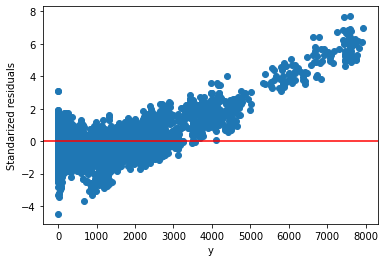

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

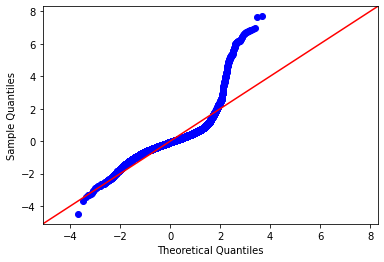

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258455e+02
graySigma           8.737685e+01
entropyMean         8.943846e-04
hMean               2.666542e+02
hSigma              9.535359e+01
sMean               8.232337e+00
sSigma              1.246465e+00
vMean               6.902910e+01
vSigma              1.319498e+01
grayMean 0          5.713214e+02
graySigma 0         2.188959e+01
entropySigma 0      9.880203e-03
hMean 0             6.687341e+02
hSigma 0            2.413840e+01
sMean 0             1.276457e+01
sSigma 0            8.460181e-02
vMean 0             1.298258e+02
vSigma 0            6.583802e-01
grayMean 1          9.137339e+02
graySigma 1         5.855153e+01
entropyMean 1       8.369477e-04
entropySigma 1      3.669825e-02
hMean 1             9.583729e+02
hSigma 1            5.919095e+01
sMean 1             1.128659e+01
sSigma 1            2.481269e-01
vMean 1             1.218385e+02
vSigma 1            3.206962e+00
WeirPt1X            1.370687e+05
WeirPt1Y            1.929713e+05
WeirPt2X  

### 20 - Veremos ahora los valores de influencia para empezar la limpieza de los datos.

In [ ]:
# Información sobre valores de influencia 
influence = model.get_influence()
summary = pd.read_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/summary_Discharge.csv')
#summary = influence.summary_frame()
#summary.to_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/summary_Discharge.csv', encoding='utf-8')
summary

,Unnamed: 0,dfb_grayMean,dfb_graySigma,dfb_entropyMean,dfb_hMean,dfb_hSigma,dfb_sMean,dfb_sSigma,dfb_vMean,dfb_vSigma,...,dfb_WwRawLineSigma,dfb_WwCurveLineMax,dfb_WwCurveLineMean,dfb_WwCurveLineSigma,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,37249,-0.007683,0.008599,-0.003152,0.007283,-0.008070,0.019485,0.008262,-0.001130,-0.003628,...,0.000007,0.002763,-0.000238,-0.000214,2.856656e-05,0.323852,0.010511,0.033378,0.323846,0.033377
1,3163,0.006037,-0.013220,0.015950,-0.005954,0.013067,0.014725,0.000833,0.004513,-0.004842,...,0.000170,0.005974,0.003916,-0.000222,1.454668e-04,-1.299228,0.003350,-0.075321,-1.299246,-0.075322
2,16840,0.000783,-0.001202,-0.001588,-0.000737,0.001182,0.000030,0.000654,0.000436,0.000835,...,0.000122,-0.001934,-0.000105,-0.000123,8.470371e-07,-0.280407,0.000420,-0.005748,-0.280401,-0.005747
3,16757,-0.000253,-0.000202,-0.000146,0.000259,0.000207,0.000178,0.000029,0.000224,-0.000261,...,0.000069,-0.000050,0.000106,-0.000051,2.475017e-08,-0.027052,0.001317,-0.000982,-0.027051,-0.000982
4,19291,-0.003894,0.002294,-0.001362,0.004014,-0.002281,-0.004876,0.004510,0.001299,-0.005431,...,0.015644,0.002883,0.008996,-0.015105,3.213995e-05,0.833049,0.001803,0.035404,0.833044,0.035404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25230,8224,0.000965,0.000724,0.001172,-0.001117,-0.000822,0.000917,-0.001101,-0.000434,-0.000780,...,0.003083,0.001842,0.001527,-0.003422,2.247275e-06,-0.353252,0.000702,-0.009362,-0.353246,-0.009362
25231,8883,-0.001441,0.001970,-0.000042,0.001367,-0.001959,-0.000198,-0.002636,-0.000079,0.002862,...,-0.001284,-0.003346,0.001343,0.001785,2.520020e-06,0.284200,0.001215,0.009914,0.284195,0.009913
25232,479,0.008634,0.002590,0.012505,-0.009078,-0.003268,-0.000660,0.015981,-0.013182,-0.006198,...,-0.008078,0.013132,-0.013096,0.009300,7.340058e-05,-0.968196,0.003044,-0.053503,-0.968195,-0.053503
25233,15372,0.001866,-0.000802,0.000555,-0.001919,0.000255,-0.002349,-0.002017,0.004278,-0.000450,...,-0.003067,-0.001173,-0.000312,0.003015,7.459810e-06,0.469279,0.001319,0.017057,0.469272,0.017056


### 21 - Obtendremos ahora valores atípicos conforme a los siguientes métodos:
- Valores atípicos de residuos
- Valores altos de apalancamiento
- Valores altos de distancia de Cook
- Valores altos de DFFIT
- Valores altos de DFBetas

Una vez que tengamos esos valores, los eliminaremos de nuestros datos de entrenamiento para ver si generamos mejores modelos.

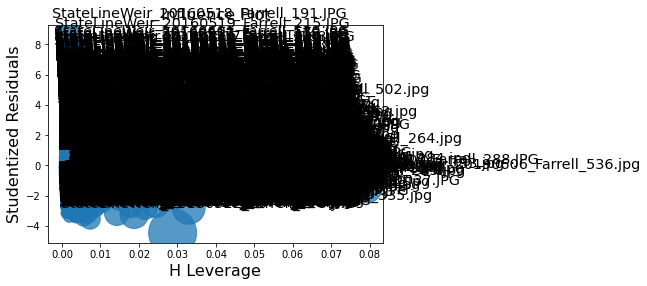

In [ ]:
# Gráfico de influencia
fig = sm.graphics.influence_plot(model, criterion="cooks", alpha = 0.5)

### 22 - Eliminaremos ahora valores atípicos conforme a los siguientes métodos:
- Valores atípicos de residuos
- Valores altos de apalancamiento
- Valores altos de distancia de Cook
- Valores altos de DFFIT
- Valores altos de DFBetas

Una vez que tengamos esos valores, los eliminaremos de nuestros datos de entrenamiento para ver si generamos mejores modelos.

In [ ]:
student_resid = influence.resid_studentized_external

outliers = np.where(abs(student_resid) > 2)
summary.iloc[outliers]

out = summary.iloc[outliers].index
x_train_t = x_train.loc[~ x_train.index.isin(out)]
y_train_t = y_train.loc[~ y_train.index.isin(out)]

In [ ]:
leverage = influence.hat_matrix_diag
n = x_train_t.shape[0]

p = x_train_t.shape[1] - 1
cutoff = (2*p+2)/n

high_leverage = np.where(leverage > cutoff)

high = summary.iloc[high_leverage].index
x_train_t = x_train_t.loc[~ x_train_t.index.isin(high)]
y_train_t = y_train_t.loc[~ y_train_t.index.isin(high)]

In [ ]:
(dffits, p) = influence.dffits

cutoff = 2/math.sqrt(p/n)
high_dffit = np.where(abs(dffits) > cutoff)

dffit = summary.iloc[high_dffit].index
x_train_t = x_train_t.loc[~ x_train_t.index.isin(dffit)]
y_train_t = y_train_t.loc[~ y_train_t.index.isin(dffit)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'DFFITs')

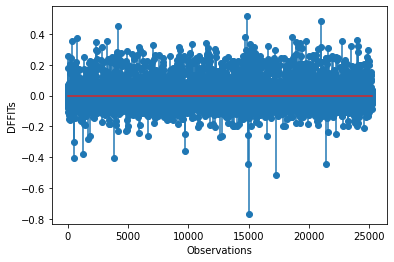

In [ ]:
plt.stem(dffits)
plt.xlabel("Observations")
plt.ylabel("DFFITs")

In [ ]:
(cooks, p) = influence.cooks_distance

cutoff = 3*cooks.mean()
high_cook = np.where(cooks > cutoff)

cook = summary.iloc[high_cook].index
x_train_t = x_train_t.loc[~ x_train_t.index.isin(cook)]
y_train_t = y_train_t.loc[~ y_train_t.index.isin(cook)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Cook distance')

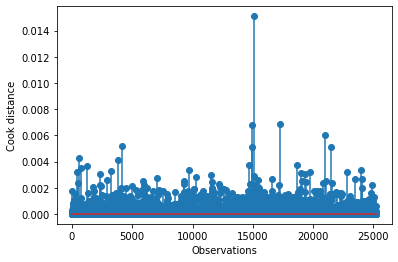

In [ ]:
plt.stem(cooks)
plt.xlabel("Observations")
plt.ylabel("Cook distance")

### 23 - Habiendo eliminado los valores atípicos, generaremos los mismo modelos para ver si obtenemos una mejor efectividad.

Empezaremos generando primero un modelo con Random Forest por ser el que se utilizó en el Paper. Verémos si podemos generar una efectividad mayor a la mencionada por los investigadores.

In [ ]:
RFR = RandomForestRegressor()

model = RFR.fit(x_train_t,y_train_t)

In [ ]:
y_pred = RFR.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

array([1440.55 , 4729.6  , 1610.3  , ...,  114.14 ,  243.451,  715.341])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.8399852532461007
MSE:  235051.26948237605
RSMSE:  484.8208632911501
MAE:  200.801479362815
Error estandar:  484.8879655345423


Text(0, 0.5, 'Standarized residuals')

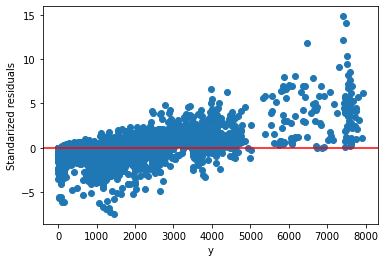

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

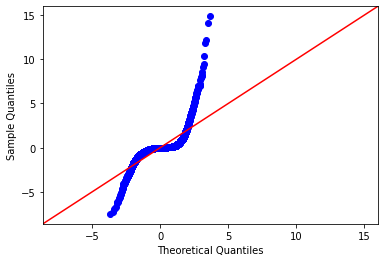

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258455e+02
graySigma           8.737685e+01
entropyMean         8.943846e-04
hMean               2.666542e+02
hSigma              9.535359e+01
sMean               8.232337e+00
sSigma              1.246465e+00
vMean               6.902910e+01
vSigma              1.319498e+01
grayMean 0          5.713214e+02
graySigma 0         2.188959e+01
entropySigma 0      9.880203e-03
hMean 0             6.687341e+02
hSigma 0            2.413840e+01
sMean 0             1.276457e+01
sSigma 0            8.460181e-02
vMean 0             1.298258e+02
vSigma 0            6.583802e-01
grayMean 1          9.137339e+02
graySigma 1         5.855153e+01
entropyMean 1       8.369477e-04
entropySigma 1      3.669825e-02
hMean 1             9.583729e+02
hSigma 1            5.919095e+01
sMean 1             1.128659e+01
sSigma 1            2.481269e-01
vMean 1             1.218385e+02
vSigma 1            3.206962e+00
WeirPt1X            1.370687e+05
WeirPt1Y            1.929713e+05
WeirPt2X  

Ahora, generaremos uno con MLP. Esto para contrastar su efectividad con la de Random Forest y comparar cuál es mejor.

In [ ]:
sc=StandardScaler()

scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
valX_scaled = scaler.transform(x_val)
testX_scaled = scaler.transform(x_test)

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(150,100,50),
                    max_iter = 300,activation = 'relu',
                    solver = 'adam')
model = MLP.fit(trainX_scaled,y_train)

In [ ]:
y_pred = MLP.predict(valX_scaled)
residuals = y_val.squeeze() - y_pred
y_pred

array([1544.86895132, 4865.36135457, 1837.10782263, ...,   38.26055986,
        212.20880571,  265.79267163])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9110624489392322
MSE:  130643.48571346734
RSMSE:  361.4463801360685
MAE:  162.61324691171185
Error estandar:  361.17446747102395


Text(0, 0.5, 'Standarized residuals')

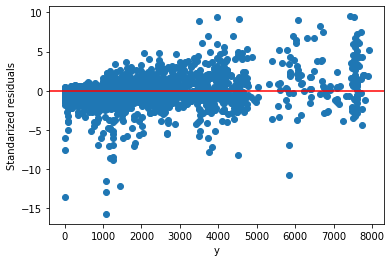

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

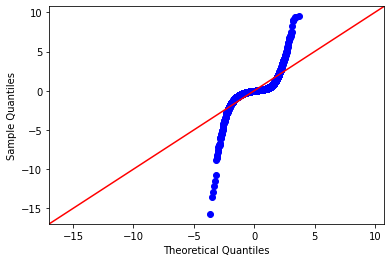

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258455e+02
graySigma           8.737685e+01
entropyMean         8.943846e-04
hMean               2.666542e+02
hSigma              9.535359e+01
sMean               8.232337e+00
sSigma              1.246465e+00
vMean               6.902910e+01
vSigma              1.319498e+01
grayMean 0          5.713214e+02
graySigma 0         2.188959e+01
entropySigma 0      9.880203e-03
hMean 0             6.687341e+02
hSigma 0            2.413840e+01
sMean 0             1.276457e+01
sSigma 0            8.460181e-02
vMean 0             1.298258e+02
vSigma 0            6.583802e-01
grayMean 1          9.137339e+02
graySigma 1         5.855153e+01
entropyMean 1       8.369477e-04
entropySigma 1      3.669825e-02
hMean 1             9.583729e+02
hSigma 1            5.919095e+01
sMean 1             1.128659e+01
sSigma 1            2.481269e-01
vMean 1             1.218385e+02
vSigma 1            3.206962e+00
WeirPt1X            1.370687e+05
WeirPt1Y            1.929713e+05
WeirPt2X  

Lo mismo haremos con SVR().

In [ ]:
SVRreg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=7.0, epsilon=0.1))
model = SVRreg.fit(x_train,y_train)

In [ ]:
y_pred = SVRreg.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

array([1279.86896175, 1657.5441686 , 1243.54207593, ...,  205.14560893,
        341.98595584,  405.74385229])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.4464374257558764
MSE:  813147.4658028209
RSMSE:  901.7468967525316
MAE:  390.64895141446806
Error estandar:  881.2995623089982


Text(0, 0.5, 'Standarized residuals')

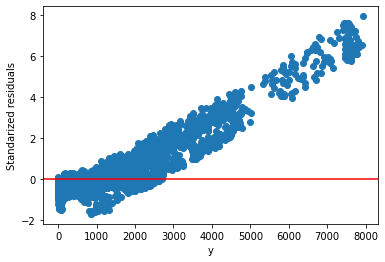

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

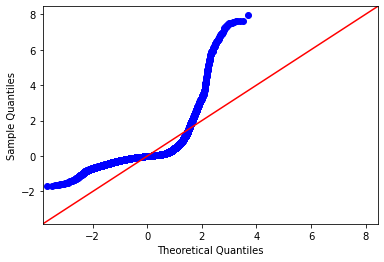

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean            2.258455e+02
graySigma           8.737685e+01
entropyMean         8.943846e-04
hMean               2.666542e+02
hSigma              9.535359e+01
sMean               8.232337e+00
sSigma              1.246465e+00
vMean               6.902910e+01
vSigma              1.319498e+01
grayMean 0          5.713214e+02
graySigma 0         2.188959e+01
entropySigma 0      9.880203e-03
hMean 0             6.687341e+02
hSigma 0            2.413840e+01
sMean 0             1.276457e+01
sSigma 0            8.460181e-02
vMean 0             1.298258e+02
vSigma 0            6.583802e-01
grayMean 1          9.137339e+02
graySigma 1         5.855153e+01
entropyMean 1       8.369477e-04
entropySigma 1      3.669825e-02
hMean 1             9.583729e+02
hSigma 1            5.919095e+01
sMean 1             1.128659e+01
sSigma 1            2.481269e-01
vMean 1             1.218385e+02
vSigma 1            3.206962e+00
WeirPt1X            1.370687e+05
WeirPt1Y            1.929713e+05
WeirPt2X  

## Stage

### 5 - Tomaremos las variables que seleccionamos y dividiremos nuestros datos en Test y Train.

In [ ]:
x = df[['grayMean','graySigma','hMean','vSigma','grayMean 0','vMean 0','hMean 1','hSigma 1','WeirPt1X','WeirPt1Y','WeirPt2X','WeirPt2Y','WwRawLineMin','WwRawLineMax','WwRawLineMean','WwRawLineSigma','WwCurveLineMax','WwCurveLineMean','WwCurveLineSigma']]
y = df['Stage']
x['discharge_predicted'] = discharge_pred
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True, random_state = 8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.25, random_state= 8)

<ipython-input-45-89c9bb400c8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['discharge_predicted'] = discharge_pred


### 6 - Utilizaremos dos metodos para conocer saber si las variables independientes que elegimos tienen la suficiente influencia para quedarse en el modelo.

El primero será Lasso. Este método nos otorga los coeficientes de cada variable para ver cuál tiene más influencia que otras.

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(clf.coef_)
print(clf.intercept_)

[-0.00000000e+00  2.18535830e-03 -3.05944085e-03  0.00000000e+00
  4.04450902e-04 -2.57368250e-04  1.25052396e-03 -2.27912514e-03
  2.04516927e-04  1.39720102e-03 -2.28031098e-04 -8.78258940e-04
 -2.21887116e-06  2.81182588e-06  5.23641867e-06  1.89866563e-06
 -7.44047865e-07 -2.61195293e-06 -2.00042028e-06  6.26550020e-04]
2.345873307326839


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e+02, tolerance: 1.634e+00
  model = cd_fast.enet_coordinate_descent(


El segundo método es con el factor de inflación de varianza.
Este también nos muestra la influencia que tiene cada variable con la que queremos proyectar. En dado caso que una salga con más de 10, la descataremos por tener una relación directa de la variable a proyectar. Lo cual generaría una desviación del modelo.

In [ ]:
X=df[['graySigma','hMean','vSigma','grayMean 0','vMean 0','hMean 1','hSigma 1','WeirPt1X','WeirPt1Y','WeirPt2X','WeirPt2Y','WwRawLineMin','WwRawLineMax','WwRawLineMean','WwRawLineSigma','WwCurveLineMax','WwCurveLineMean','WwCurveLineSigma']]
X['discharge_predicted'] = discharge_pred
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

<ipython-input-47-a4a0fa5a32a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['discharge_predicted'] = discharge_pred


               features    vif_Factor
0             graySigma  3.122398e+01
1                 hMean  6.998787e+01
2                vSigma  1.339546e+01
3            grayMean 0  2.822568e+01
4               vMean 0  1.189006e+02
5               hMean 1  8.831616e+01
6              hSigma 1  2.487617e+01
7              WeirPt1X  1.941464e+06
8              WeirPt1Y  8.475098e+05
9              WeirPt2X  9.589958e+06
10             WeirPt2Y  6.283125e+05
11         WwRawLineMin  4.169791e+00
12         WwRawLineMax  8.596769e+02
13        WwRawLineMean  2.206760e+04
14       WwRawLineSigma  5.016160e+03
15       WwCurveLineMax  7.892739e+02
16      WwCurveLineMean  2.177198e+04
17     WwCurveLineSigma  4.890885e+03
18  discharge_predicted  3.566170e+00


### 7 - Generaremos un modelo regresor con Random Forest sin limpiar los datos para comprobar la fiabilidad mostrada el Paper inicial.

Teniendo el modelo analizaremos su efectividad.

In [ ]:
RFR = RandomForestRegressor()

model = RFR.fit(x_train,y_train)

In [ ]:
y_pred = RFR.predict(x_val)
residuals = y_val.squeeze() - y_pred
residuals

Filename
StateLineWeir_20170711_Farrell_613.jpg   -0.0355
StateLineWeir_20160627_Farrell_134.JPG   -0.1468
StateLineWeir_20170913_Farrell_368.jpg    0.0602
StateLineWeir_20141026_Farrell_860.JPG    0.0008
StateLineWeir_20141017_Farrell_700.JPG    0.0018
                                           ...  
StateLineWeir_20161223_Farrell_073.jpg   -0.0371
StateLineWeir_20150528_Farrell_900.JPG   -0.0206
StateLineWeir_20130518_Farrell_124.JPG    0.0211
StateLineWeir_20190428_Farrell_865.jpg    0.1027
StateLineWeir_20160411_Farrell_366.JPG   -0.1936
Name: Stage, Length: 8412, dtype: float64

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9348233685274212
MSE:  0.043348343158582964
RSMSE:  0.20820264925928048
MAE:  0.10233146695197334
Error estandar:  0.20823741404732551


Text(0, 0.5, 'Standarized residuals')

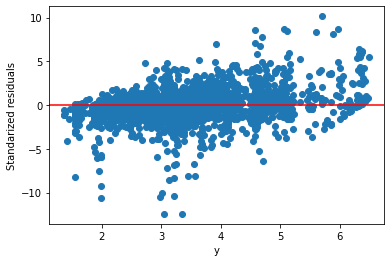

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

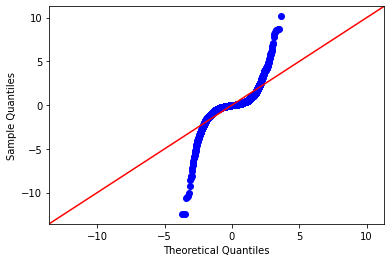

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.235622e+06
dtype: float64 0.04334735597979876


### 8 - Utilizaremos también los modelos MLP y SVR para contrastarlos con los del paper.
Teniendo el modelo analizaremos su efectividad.


**MLP**

In [ ]:
sc=StandardScaler()

scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
valX_scaled = scaler.transform(x_val)
testX_scaled = scaler.transform(x_test)

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(150,100,50),
                    max_iter = 300,activation = 'relu',
                    solver = 'adam')
model = MLP.fit(trainX_scaled,y_train)

In [ ]:
y_pred = MLP.predict(valX_scaled)
residuals = y_val.squeeze() - y_pred
residuals

Filename
StateLineWeir_20170711_Farrell_613.jpg    0.022735
StateLineWeir_20160627_Farrell_134.JPG   -0.439949
StateLineWeir_20170913_Farrell_368.jpg   -0.059820
StateLineWeir_20141026_Farrell_860.JPG   -0.022429
StateLineWeir_20141017_Farrell_700.JPG   -0.019702
                                            ...   
StateLineWeir_20161223_Farrell_073.jpg   -0.030650
StateLineWeir_20150528_Farrell_900.JPG   -0.292427
StateLineWeir_20130518_Farrell_124.JPG   -0.084474
StateLineWeir_20190428_Farrell_865.jpg    0.024109
StateLineWeir_20160411_Farrell_366.JPG   -0.213041
Name: Stage, Length: 8412, dtype: float64

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9289439205480987
MSE:  0.04725870677867795
RSMSE:  0.21739067776396934
MAE:  0.12115135168475165
Error estandar:  0.21460197784806434


Text(0, 0.5, 'Standarized residuals')

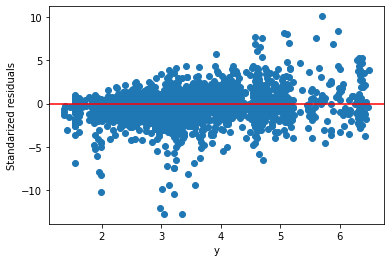

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

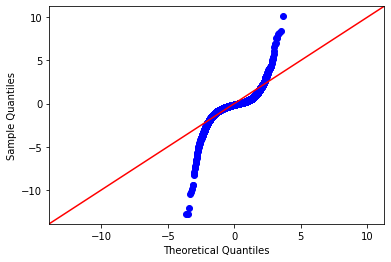

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.235622e+06
dtype: float64 0.04603758449940512


**SVR**

In [ ]:
SVRreg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=7.0, epsilon=0.1))
model = SVRreg.fit(x_train,y_train)

In [ ]:
y_pred = SVRreg.predict(x_val)
residuals = y_val.squeeze() - y_pred
residuals

Filename
StateLineWeir_20170711_Farrell_613.jpg   -0.036783
StateLineWeir_20160627_Farrell_134.JPG   -0.272232
StateLineWeir_20170913_Farrell_368.jpg    0.040691
StateLineWeir_20141026_Farrell_860.JPG    0.028967
StateLineWeir_20141017_Farrell_700.JPG   -0.026237
                                            ...   
StateLineWeir_20161223_Farrell_073.jpg    0.010359
StateLineWeir_20150528_Farrell_900.JPG    0.061739
StateLineWeir_20130518_Farrell_124.JPG   -0.068139
StateLineWeir_20190428_Farrell_865.jpg    0.049851
StateLineWeir_20160411_Farrell_366.JPG   -0.100831
Name: Stage, Length: 8412, dtype: float64

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9340041135981467
MSE:  0.04389322163735938
RSMSE:  0.20950709209322577
MAE:  0.11508667649868728
Error estandar:  0.20952219080878662


Text(0, 0.5, 'Standarized residuals')

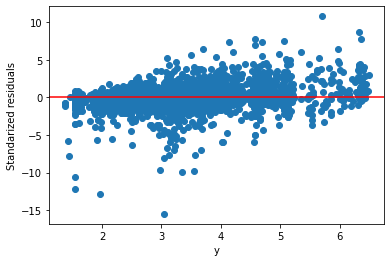

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

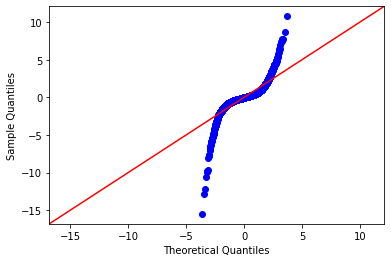

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.320952e+06
dtype: float64 0.04388389239693366


### 9 - Generaremos ahora un modelo regresión de tipo mínimos cuadrados ordinarios. Esto nos permitirá comparar este modelo con el anterior de Random Forest.

In [ ]:
reg = sm.OLS(y_train, x_train)
model = reg.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Stage   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.475e+05
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:34:37   Log-Likelihood:                          3215.5
No. Observations:               25234   AIC:                                     -6391.
Df Residuals:                   25214   BIC:                                     -6228.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
y_pred = model.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

Filename
StateLineWeir_20170711_Farrell_613.jpg    3.409249
StateLineWeir_20160627_Farrell_134.JPG    4.632093
StateLineWeir_20170913_Farrell_368.jpg    3.512500
StateLineWeir_20141026_Farrell_860.JPG    2.418701
StateLineWeir_20141017_Farrell_700.JPG    2.417354
                                            ...   
StateLineWeir_20161223_Farrell_073.jpg    2.518357
StateLineWeir_20150528_Farrell_900.JPG    5.703928
StateLineWeir_20130518_Farrell_124.JPG    2.282131
StateLineWeir_20190428_Farrell_865.jpg    2.320358
StateLineWeir_20160411_Farrell_366.JPG    2.364200
Length: 8412, dtype: float64

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.8858728596031957
MSE:  0.07590485015645293
RSMSE:  0.2755083486147977
MAE:  0.1737329064230047
Error estandar:  0.2755123862175521


Text(0, 0.5, 'Standarized residuals')

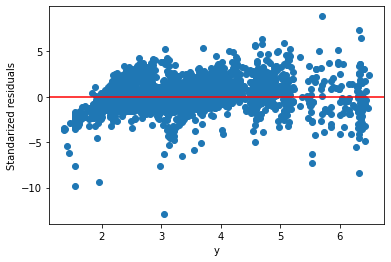

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

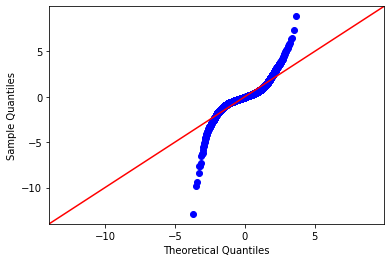

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.320952e+06
dtype: float64 0.07588000396251382


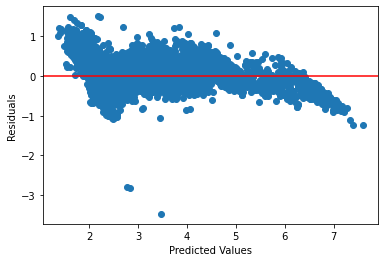

In [ ]:
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

### 10 - Veremos ahora los valores de influencia para empezar la limpieza de los datos.

In [ ]:
# Información sobre valores de influencia 
influence = model.get_influence()
summary = pd.read_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/summary_Stage.csv')
#summary = influence.summary_frame()
#summary.to_csv('/content/drive/Shareddrives/Caudales - Concentración/Reto/Dataset/summary_Stage.csv', encoding='utf-8')
summary

,Unnamed: 0,dfb_grayMean,dfb_graySigma,dfb_hMean,dfb_vSigma,dfb_grayMean 0,dfb_vMean 0,dfb_hMean 1,dfb_hSigma 1,dfb_WeirPt1X,...,dfb_WwRawLineSigma,dfb_WwCurveLineMax,dfb_WwCurveLineMean,dfb_WwCurveLineSigma,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,37249,-0.010064,0.000456,0.009979,0.003039,-0.000089,0.012840,-0.010546,-0.007073,-0.000637,...,-0.000439,0.005353,-0.003679,3.655915e-05,0.000043,0.803709,0.001251,0.028440,0.803704,0.028440
1,3163,0.008166,0.000782,-0.008349,0.018200,-0.005065,0.012594,-0.002764,-0.026851,0.014501,...,0.006134,0.010139,0.010602,-7.841858e-03,0.000093,-1.932667,0.000472,-0.041983,-1.932772,-0.041985
2,16840,0.001838,-0.000721,-0.001927,0.004220,0.001854,-0.001095,0.000134,0.001034,0.000078,...,-0.000047,-0.002996,-0.000601,-9.710862e-07,0.000003,-0.498352,0.000251,-0.007903,-0.498345,-0.007903
3,16757,-0.004500,0.001869,0.004551,-0.002435,-0.005066,0.003238,-0.000963,-0.001937,0.003567,...,0.000873,-0.000471,-0.000348,-5.310231e-04,0.000007,-0.446946,0.000618,-0.011117,-0.446939,-0.011117
4,19291,-0.005453,0.003311,0.005437,0.000641,0.000605,0.004793,-0.008022,-0.001136,-0.001157,...,0.015298,0.003657,0.007695,-1.492111e-02,0.000051,0.809848,0.001463,0.030997,0.809842,0.030997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25230,8224,0.000548,-0.000533,-0.000576,-0.000191,0.000041,-0.000107,0.000826,0.001261,0.002406,...,0.002212,0.001772,0.001118,-2.465773e-03,0.000002,-0.268503,0.000425,-0.005539,-0.268498,-0.005539
25231,8883,-0.002071,-0.002780,0.001979,0.004767,-0.002472,0.002204,0.001522,0.000415,0.002778,...,-0.002594,-0.009764,0.006662,4.054496e-03,0.000031,0.892656,0.000744,0.024351,0.892652,0.024351
25232,479,-0.002278,0.008526,0.002071,-0.010184,0.001352,-0.002745,-0.001787,0.008685,-0.001061,...,-0.010256,0.015846,-0.015521,1.161295e-02,0.000107,-1.240896,0.001317,-0.045062,-1.240909,-0.045062
25233,15372,0.004925,-0.005715,-0.004983,0.003270,-0.001796,0.003487,0.001206,-0.000135,-0.004916,...,-0.003659,0.000547,-0.000010,3.479495e-03,0.000006,0.430054,0.000633,0.010826,0.430047,0.010826


### 11 - Obtendremos ahora valores atípicos conforme a los siguientes métodos:
- Valores atípicos de residuos
- Valores altos de apalancamiento
- Valores altos de distancia de Cook
- Valores altos de DFFIT
- Valores altos de DFBetas

Una vez que tengamos esos valores, los eliminaremos de nuestros datos de entrenamiento para ver si generamos mejores modelos.

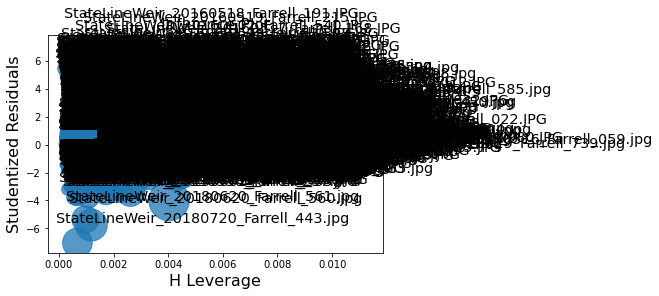

In [ ]:
# Gráfico de influencia
fig = sm.graphics.influence_plot(model, criterion="cooks", alpha = 0.5)

In [ ]:
student_resid = influence.resid_studentized_external

outliers = np.where(abs(student_resid) > 2)
summary.iloc[outliers]

,Unnamed: 0,dfb_grayMean,dfb_graySigma,dfb_hMean,dfb_vSigma,dfb_grayMean 0,dfb_vMean 0,dfb_hMean 1,dfb_hSigma 1,dfb_WeirPt1X,...,dfb_WwRawLineSigma,dfb_WwCurveLineMax,dfb_WwCurveLineMean,dfb_WwCurveLineSigma,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
3,16757,-0.004500,0.001869,0.004551,-0.002435,-0.005066,0.003238,-0.000963,-0.001937,0.003567,...,0.000873,-0.000471,-0.000348,-0.000531,6.504740e-06,-0.446946,0.000618,-0.011117,-0.446939,-0.011117
11,26958,-0.001647,0.000404,0.001636,-0.002301,-0.001995,-0.001589,0.002515,0.001654,-0.004403,...,0.004794,-0.000885,0.011277,-0.004306,2.398131e-05,0.995032,0.000460,0.021346,0.995032,0.021346
19,19995,0.002206,-0.007182,-0.002481,0.003127,0.001524,0.005553,0.000799,0.006486,0.002804,...,0.003017,-0.000798,0.005757,-0.003556,2.879344e-05,-0.692248,0.001140,-0.023390,-0.692241,-0.023389
31,4092,-0.000192,-0.000316,0.000207,0.000993,0.000538,-0.000212,-0.000525,0.000036,-0.000125,...,-0.000647,0.000826,0.000031,0.000640,3.652212e-07,-0.104243,0.000638,-0.002634,-0.104241,-0.002634
34,24725,0.002041,0.004767,-0.001900,-0.013662,-0.006655,0.004247,0.006898,-0.020330,-0.003356,...,-0.002428,0.010756,0.011770,0.005938,1.858910e-04,2.391686,0.000617,0.059430,2.391910,0.059436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25144,23727,0.004797,0.002271,-0.004837,-0.002059,0.004548,-0.000883,-0.002128,0.001504,0.005351,...,-0.002158,-0.003346,-0.002518,0.002315,4.045434e-05,1.360472,0.000415,0.027724,1.360495,0.027725
25167,731,-0.000986,0.000750,0.000944,-0.000755,-0.000393,0.000825,-0.000718,0.000655,-0.001097,...,0.000227,-0.000224,0.001182,-0.000362,8.974245e-07,-0.174364,0.000561,-0.004129,-0.174361,-0.004129
25174,25378,-0.001100,0.001078,0.001064,-0.000602,0.001032,-0.000054,-0.001624,0.002421,0.000684,...,-0.000861,0.000617,-0.000085,0.000424,6.887731e-06,0.288519,0.001570,0.011440,0.288514,0.011439
25206,41628,-0.005316,0.004326,0.005609,-0.001502,0.002613,0.000475,-0.007429,-0.005509,0.004293,...,0.002311,0.004794,-0.001698,-0.002497,1.373606e-05,-0.535610,0.000909,-0.016155,-0.535602,-0.016155


### 12 - Eliminaremos ahora valores atípicos conforme a los siguientes métodos:
- Valores atípicos de residuos
- Valores altos de apalancamiento
- Valores altos de distancia de Cook
- Valores altos de DFFIT
- Valores altos de DFBetas

Una vez que tengamos esos valores, los eliminaremos de nuestros datos de entrenamiento para ver si generamos mejores modelos.

In [ ]:
student_resid = influence.resid_studentized_external

outliers = np.where(abs(student_resid) > 2)
summary.iloc[outliers]

out = summary.iloc[outliers].index
x_train_t = x_train.loc[~ x_train.index.isin(out)]
y_train_t = y_train.loc[~ y_train.index.isin(out)]

In [ ]:
leverage = influence.hat_matrix_diag
n = x_train_t.shape[0]

p = x_train_t.shape[1] - 1
cutoff = (2*p+2)/n

high_leverage = np.where(leverage > cutoff)

high = summary.iloc[high_leverage].index
x_train_t = x_train_t.loc[~ x_train_t.index.isin(high)]
y_train_t = y_train_t.loc[~ y_train_t.index.isin(high)]

In [ ]:
(dffits, p) = influence.dffits

cutoff = 2/math.sqrt(p/n)
high_dffit = np.where(abs(dffits) > cutoff)

dffit = summary.iloc[high_dffit].index
x_train_t = x_train_t.loc[~ x_train_t.index.isin(dffit)]
y_train_t = y_train_t.loc[~ y_train_t.index.isin(dffit)]

<ipython-input-66-836f5420baea>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(dffits)


Text(0, 0.5, 'DFFITs')

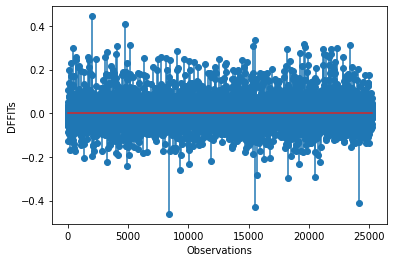

In [ ]:
plt.stem(dffits)
plt.xlabel("Observations")
plt.ylabel("DFFITs")

In [ ]:
(cooks, p) = influence.cooks_distance

cutoff = 3*cooks.mean()
high_cook = np.where(cooks > cutoff)

cook = summary.iloc[high_cook].index
x_train_t = x_train_t.loc[~ x_train_t.index.isin(cook)]
y_train_t = y_train_t.loc[~ y_train_t.index.isin(cook)]

<ipython-input-68-54b2dafc638f>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(cooks)


Text(0, 0.5, 'Cook distance')

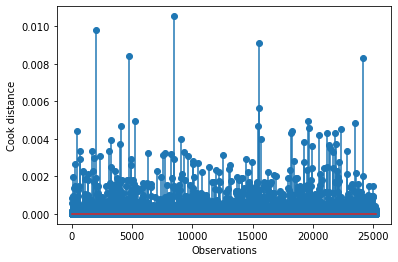

In [ ]:
plt.stem(cooks)
plt.xlabel("Observations")
plt.ylabel("Cook distance")

### 13 - Habiendo eliminado los valores atípicos, generaremos los mismo modelos para ver si obtenemos una mejor efectividad.

Empezaremos generando primero un modelo con Random Forest por ser el que se utilizó en el Paper. Verémos si podemos generar una efectividad mayor a la mencionada por los investigadores.

In [ ]:
RFR = RandomForestRegressor()

model = RFR.fit(x_train_t,y_train_t)

In [ ]:
y_pred = RFR.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

array([3.4321, 4.8629, 3.5961, ..., 1.6049, 2.272 , 2.265 ])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9347624280044261
MSE:  0.043388874107227755
RSMSE:  0.2082999618512393
MAE:  0.10250343556823586
Error estandar:  0.20833654038438645


Text(0, 0.5, 'Standarized residuals')

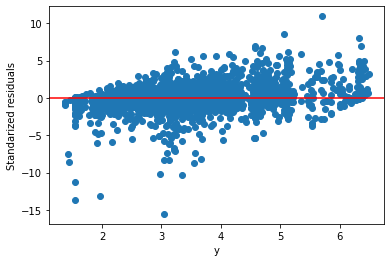

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

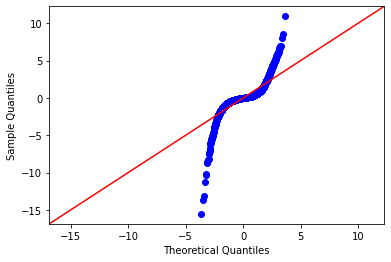

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.320952e+06
dtype: float64 0.04338863470339382


Ahora, generaremos uno con MLP. Esto para contrastar su efectividad con la de Random Forest y comparar cuál es mejor.

In [ ]:
sc=StandardScaler()

scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
valX_scaled = scaler.transform(x_val)
testX_scaled = scaler.transform(x_test)

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(150,100,50),
                    max_iter = 300,activation = 'relu',
                    solver = 'adam')
model = MLP.fit(trainX_scaled,y_train)

In [ ]:
y_pred = MLP.predict(valX_scaled)
residuals = y_val.squeeze() - y_pred
y_pred

array([3.45181291, 5.0264471 , 3.54230867, ..., 1.66219188, 2.25083884,
       2.3710258 ])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9307376890618712
MSE:  0.046065688800834406
RSMSE:  0.21462918906997344
MAE:  0.11710421955192502
Error estandar:  0.2143773137454902


Text(0, 0.5, 'Standarized residuals')

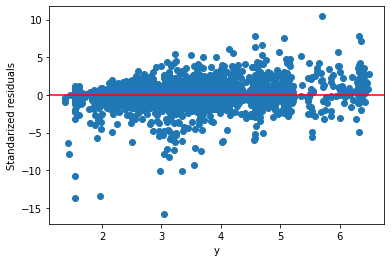

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

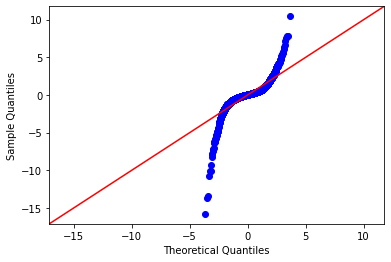

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.320952e+06
dtype: float64 0.04594124262282339


Lo mismo con SVR.

In [ ]:
SVRreg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=7.0, epsilon=0.1))
model = SVRreg.fit(x_train,y_train)

In [ ]:
y_pred = SVRreg.predict(x_val)
residuals = y_val.squeeze() - y_pred
y_pred

array([3.4467832 , 4.86223193, 3.59930943, ..., 1.67813859, 2.29014949,
       2.43083069])

In [ ]:
print("R^2: ", r2_score(y_val, y_pred))
print("MSE: ", mse(y_val, y_pred))
print("RSMSE: ", rmse(y_val, y_pred))
print("MAE: ", meanabs(y_val, y_pred))
print("Error estandar: ", stde(y_val, y_pred, ddof = 3))

R^2:  0.9340041135981467
MSE:  0.04389322163735938
RSMSE:  0.20950709209322577
MAE:  0.11508667649868728
Error estandar:  0.20952219080878662


Text(0, 0.5, 'Standarized residuals')

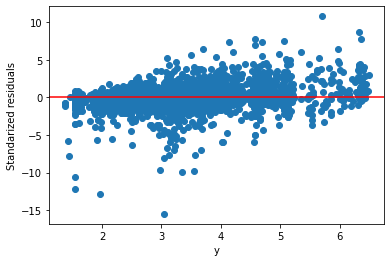

In [ ]:
# Gráfica de residuos
res = y_val - y_pred
plt.scatter(y_val, res/res.std())
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y")
plt.ylabel("Standarized residuals")

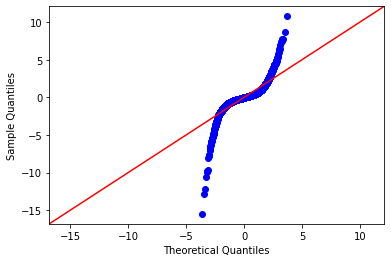

In [ ]:
# Gráfico cuantil-cuantil
figure = sm.qqplot(res/res.std(), line ='45')
plt.show()

In [ ]:
# Prueba de normalidad
print(np.var(x), np.var(res))

grayMean               2.258436e+02
graySigma              8.738272e+01
hMean                  2.666514e+02
vSigma                 1.319502e+01
grayMean 0             5.713138e+02
vMean 0                1.298260e+02
hMean 1                9.582901e+02
hSigma 1               5.919077e+01
WeirPt1X               1.370681e+05
WeirPt1Y               1.929711e+05
WeirPt2X               6.107100e+05
WeirPt2Y               4.373805e+05
WwRawLineMin           2.164937e+07
WwRawLineMax           1.038308e+09
WwRawLineMean          3.252080e+08
WwRawLineSigma         6.431305e+07
WwCurveLineMax         9.241960e+08
WwCurveLineMean        3.148018e+08
WwCurveLineSigma       6.586681e+07
discharge_predicted    1.320952e+06
dtype: float64 0.04388389239693366
